In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

model_save_path = './PredictModel/vietnam_covid_predict.hdf5'
DATA_PATH = [
    './Data/0_ToanQuoc_covid_data.csv', 
]

# Data visualizing

In [2]:
df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df[path] = pd.read_csv(DATA_PATH[path])
    df[path] = df[path].drop(columns=['Unnamed: 0'])
    # df[path].drop(df[path].tail(26).index,inplace=True)
    for idx in range(len(df[path].index)):
        df[path].iat[idx, 0] = datetime.strptime(df[path].iat[idx, 0], '%Y-%m-%d %H:%M:%S')
    df[path] = df[path].sort_values(by=['date'])

In [3]:
df[0].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
377,2022-04-12 00:00:00,953750,399048921.0,0.0,0.0,958.0,1676923.0,0.0,0.0
390,2022-04-13 00:00:00,1011700,398767621.0,0.0,0.0,319.0,1677242.0,0.0,0.0
414,2022-04-14 00:00:00,938274,399705895.0,0.0,0.0,632.0,1677776.0,0.0,0.0
126,2022-04-15 00:00:00,828982,402440299.0,0.0,0.0,446.0,1678222.0,0.0,0.0
20,2022-04-16 00:00:00,750965,403420624.0,0.0,0.0,223.0,1678445.0,0.0,0.0
396,2022-04-17 00:00:00,627856,403936006.0,0.0,0.0,45.0,1678490.0,0.0,0.0
387,2022-04-18 00:00:00,559857,404239460.0,0.0,0.0,106.0,1678596.0,0.0,0.0
124,2022-04-19 00:00:00,567912,406221184.0,0.0,0.0,592.0,1679188.0,0.0,0.0
76,2022-04-20 00:00:00,533604,406754788.0,0.0,0.0,161.0,1679349.0,0.0,0.0
319,2022-04-21 00:00:00,484711,407257590.0,0.0,0.0,124.0,1679473.0,0.0,0.0


In [4]:
# Summary Stats
df[0].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,4.850000e+02,4.850000e+02,4.850000e+02,4.850000e+02,485.000000,4.850000e+02,485.000000,485.000000
mean,6.288417e+05,6.106623e+07,3.441926e+04,7.751119e+05,3470.573196,6.951191e+05,673.626804,145505.517526
std,1.332991e+06,1.099369e+08,1.376620e+05,2.115628e+06,5639.767925,6.860041e+05,2242.719456,157350.401425
min,0.000000e+00,6.276500e+04,0.000000e+00,0.000000e+00,0.000000,1.982000e+03,0.000000,0.000000
25%,1.120000e+03,1.218210e+05,0.000000e+00,0.000000e+00,0.000000,1.982000e+03,0.000000,0.000000
50%,2.044410e+05,1.861610e+07,0.000000e+00,3.189000e+03,1026.000000,5.910530e+05,0.000000,88655.000000
75%,4.750580e+05,5.445392e+07,4.112000e+03,3.446100e+04,4179.000000,1.408822e+06,0.000000,367576.000000
max,6.968532e+06,4.122288e+08,2.471446e+06,9.668679e+06,43728.000000,1.680627e+06,19562.000000,386837.000000


In [5]:
df_filtered = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df_filtered[path] = df[path][df[path]['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]

<AxesSubplot:xlabel='date'>

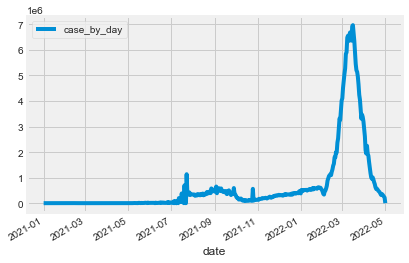

In [6]:
df_filtered[0].plot(x ='date', y='case_by_day', kind = 'line')

# Predicting case by day

In [7]:
new_df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    new_df[path] = df_filtered[path].set_index('date')

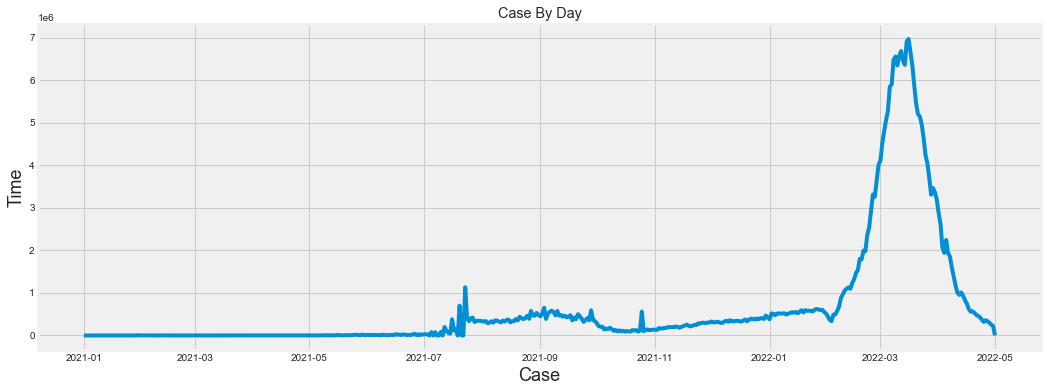

In [8]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[0]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [9]:
data = [None] * len(DATA_PATH)
dataset = [None] * len(DATA_PATH)
training_data_len = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create a new dataframe with only the 'Close column 
    data[path] = new_df[path].filter(['case_by_day'])
    # Convert the dataframe to a numpy array
    dataset[path] = data[path].values
    # Get the number of rows to train the model on
    # training_data_len[path] = int(np.ceil(len(dataset[path]) * .95 ))
    training_data_len[path] = len(dataset[path]) - 30
    print(training_data_len[path])
    print(dataset[path])

455
[[    169]
 [    275]
 [    395]
 [    136]
 [    287]
 [     20]
 [    100]
 [     94]
 [     43]
 [     36]
 [     62]
 [    115]
 [     18]
 [    372]
 [    304]
 [     36]
 [      0]
 [    104]
 [     60]
 [    248]
 [     50]
 [     77]
 [      0]
 [      0]
 [     44]
 [    124]
 [      0]
 [    512]
 [   4228]
 [   4708]
 [   1606]
 [   1410]
 [   1359]
 [   1120]
 [   1896]
 [    713]
 [    189]
 [    843]
 [   2639]
 [    860]
 [    965]
 [   2111]
 [     89]
 [   2393]
 [   1421]
 [   1767]
 [   1811]
 [    774]
 [    774]
 [    645]
 [    258]
 [    645]
 [    441]
 [    391]
 [    473]
 [    319]
 [    204]
 [    258]
 [    584]
 [    427]
 [    473]
 [    275]
 [    258]
 [     78]
 [    568]
 [    120]
 [    382]
 [     54]
 [    120]
 [    103]
 [    415]
 [     98]
 [     62]
 [     70]
 [    129]
 [    201]
 [    105]
 [     62]
 [     12]
 [      0]
 [     88]
 [     44]
 [      0]
 [    148]
 [    268]
 [      0]
 [    136]
 [     98]
 [      0]
 [    243]
 [    

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    scaled_data[path] = scaler.fit_transform(dataset[path])

scaled_data

[array([[2.42518797e-05],
        [3.94631179e-05],
        [5.66833875e-05],
        [1.95163056e-05],
        [4.11851449e-05],
        [2.87004494e-06],
        [1.43502247e-05],
        [1.34892112e-05],
        [6.17059662e-06],
        [5.16608089e-06],
        [8.89713931e-06],
        [1.65027584e-05],
        [2.58304045e-06],
        [5.33828359e-05],
        [4.36246831e-05],
        [5.16608089e-06],
        [0.00000000e+00],
        [1.49242337e-05],
        [8.61013482e-06],
        [3.55885572e-05],
        [7.17511235e-06],
        [1.10496730e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [6.31409887e-06],
        [1.77942786e-05],
        [0.00000000e+00],
        [7.34731504e-05],
        [6.06727500e-04],
        [6.75608579e-04],
        [2.30464609e-04],
        [2.02338168e-04],
        [1.95019554e-04],
        [1.60722517e-04],
        [2.72080260e-04],
        [1.02317102e-04],
        [2.71219247e-05],
        [1.20972394e-04],
        [3.7

In [11]:
DATA_LEN = 60
train_data = [None] * len(DATA_PATH)
test_data = [None] * len(DATA_PATH)
x_train = [None] * len(DATA_PATH)
y_train = [None] * len(DATA_PATH)
x_test = [None] * len(DATA_PATH)
y_test = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create the training data set 
    # Create the scaled training data set
    train_data[path] = scaled_data[path][0:int(training_data_len[path]), :]
    # Split the data into x_train and y_train data sets
    x_train[path] = []
    y_train[path] = []

    for idx in range(DATA_LEN, len(train_data[path])):
        x_train[path].append(train_data[path][idx - DATA_LEN: idx, 0])
        y_train[path].append(train_data[path][idx, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_train[path], y_train[path] = np.array(x_train[path]), np.array(y_train[path])

    # Reshape the data
    x_train[path] = np.reshape(x_train[path], (x_train[path].shape[0], x_train[path].shape[1], 1))
    
    # Create the testing data set
    test_data[path] = scaled_data[path][training_data_len[path] - DATA_LEN: , :]
    # Create the data sets x_test and y_test
    x_test[path] = []
    y_test[path] = scaled_data[path][training_data_len[path]:, :]
    for i in range(DATA_LEN, len(test_data[path])):
        x_test[path].append(test_data[path][i - DATA_LEN: i, 0])

    # Convert the data to a numpy array
    x_test[path], y_test[path] = np.array(x_test[path]), np.array(y_test[path])

    # Reshape the data
    x_test[path] = np.reshape(x_test[path], (x_test[path].shape[0], x_test[path].shape[1], 1 ))
    
x_train, y_train, x_test, y_test

([array([[[2.42518797e-05],
          [3.94631179e-05],
          [5.66833875e-05],
          ...,
          [3.70235797e-05],
          [8.38053122e-05],
          [6.12754595e-05]],
  
         [[3.94631179e-05],
          [5.66833875e-05],
          [1.95163056e-05],
          ...,
          [8.38053122e-05],
          [6.12754595e-05],
          [6.78765628e-05]],
  
         [[5.66833875e-05],
          [1.95163056e-05],
          [4.11851449e-05],
          ...,
          [6.12754595e-05],
          [6.78765628e-05],
          [3.94631179e-05]],
  
         ...,
  
         [[8.57496242e-02],
          [8.68609056e-02],
          [7.96936858e-02],
          ...,
          [5.31654013e-01],
          [4.74688930e-01],
          [4.97105703e-01]],
  
         [[8.68609056e-02],
          [7.96936858e-02],
          [7.43058940e-02],
          ...,
          [4.74688930e-01],
          [4.97105703e-01],
          [4.83350295e-01]],
  
         [[7.96936858e-02],
          [7.4305894

In [12]:
from functools import reduce

X_train = x_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_train[1:], x_train[0])
Y_train = y_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_train[1:], y_train[0])
X_test = x_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_test[1:], x_test[0])
Y_test = y_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_test[1:], y_test[0])

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

# Build the LSTM model
model = Sequential() 
model.add(LSTM(30, return_sequences=True, input_shape=(DATA_LEN, 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20)                4080      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,141
Trainable params: 8,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train the model
model.fit(
    X_train, 
    Y_train, 
    batch_size=8,
    epochs=50,
    validation_data=(X_test, Y_test)
)

Epoch 1/50
50/50 [==============================] - 7s 48ms/step - loss: 0.0103 - val_loss: 0.0156
Epoch 2/50
50/50 [==============================] - 2s 36ms/step - loss: 0.0060 - val_loss: 0.0144
Epoch 3/50
50/50 [==============================] - 2s 33ms/step - loss: 0.0029 - val_loss: 0.0139
Epoch 4/50
50/50 [==============================] - 2s 34ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 5/50
50/50 [==============================] - 2s 34ms/step - loss: 6.9007e-04 - val_loss: 0.0018
Epoch 6/50
50/50 [==============================] - 2s 36ms/step - loss: 6.1450e-04 - val_loss: 0.0021
Epoch 7/50
50/50 [==============================] - 2s 36ms/step - loss: 6.0909e-04 - val_loss: 0.0016
Epoch 8/50
50/50 [==============================] - 2s 34ms/step - loss: 5.5291e-04 - val_loss: 8.9794e-04
Epoch 9/50
50/50 [==============================] - 2s 35ms/step - loss: 6.4761e-04 - val_loss: 0.0012
Epoch 10/50
50/50 [==============================] - 2s 35ms/step - loss: 5.3172e-04 

In [16]:
train_predictions = [None] * len(DATA_PATH)
test_predictions = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Get the models predicted price values
    train_predictions[path] = model.predict(x_train[path])
    test_predictions[path] = model.predict(x_test[path])
    train_predictions[path] = scaler.inverse_transform(train_predictions[path])
    test_predictions[path] = scaler.inverse_transform(test_predictions[path])

    # Get the root mean squared error (RMSE)
    # train_rmse = np.sqrt(np.mean(((train_predictions[path] - scaler.inverse_transform(y_train[path])) ** 2)))
    test_rmse = np.sqrt(np.mean(((test_predictions[path] - scaler.inverse_transform(y_test[path])) ** 2)))
    print(test_rmse)

353288.2157753478


In [17]:
val_loss = model.evaluate(X_test, Y_test, batch_size=8)

4/4 [==============================] - 0s 10ms/step - loss: 0.0026


In [18]:
train = [None] * len(DATA_PATH)
test_valid = [None] * len(DATA_PATH)
train_valid = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    train[path] = data[path][:training_data_len[path]]
    test_valid[path] = data[path][training_data_len[path]:]
    test_valid[path].insert(1, 'case_by_day_test_predict', test_predictions[path])
    train_valid[path] = data[path][60:training_data_len[path]]
    train_valid[path].insert(1, 'case_by_day_train_predict', train_predictions[path])

In [19]:
# for path in range(len(DATA_PATH)):
#     for idx in range(len(valid[path].index)):
#         valid[path].iat[idx, 0] = 0 if valid[path].iat[idx, 0] < 0 else valid[path].iat[idx, 0]
#         valid[path].iat[idx, 1] = 0 if valid[path].iat[idx, 1] < 0 else valid[path].iat[idx, 1]

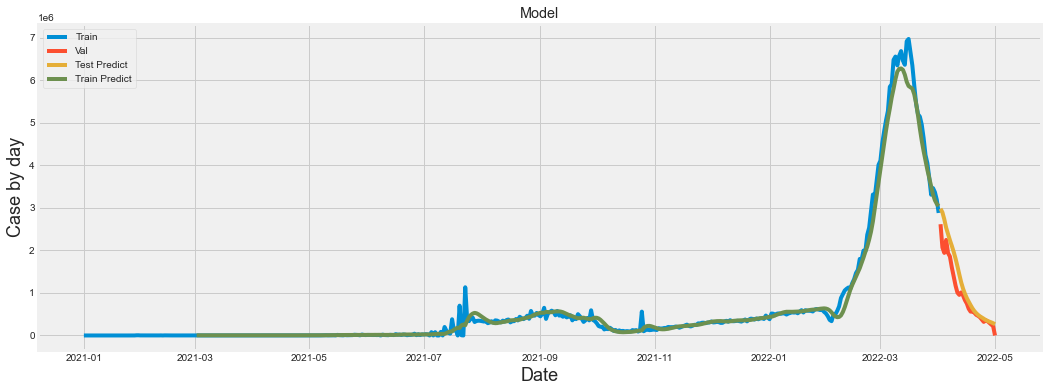

In [20]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[0]['case_by_day'])
plt.plot(test_valid[0][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[0]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [21]:
# # Show the valid and predicted prices
# valid[0]

In [22]:
model.save(model_save_path, include_optimizer=False)